In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv('/home/asif/Code/Godhuli/superstore_sales_analysis/Data/superstore.csv',encoding='latin1')

In [33]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# 1. Data Understanding and Preparation

#### 1.1 Data Exploration

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

<Axes: >

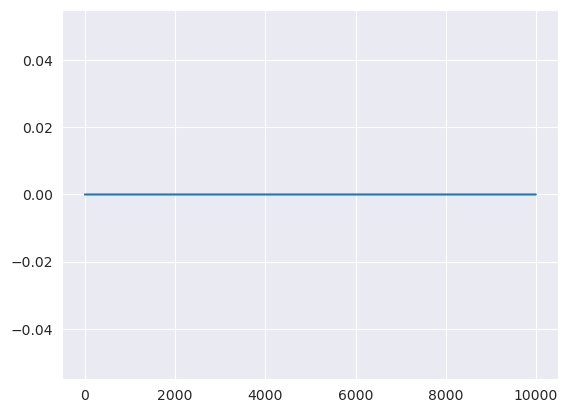

In [38]:
df.isnull().sum(axis=1).plot()

No Null values

#### 1.2 Data Cleaning 

In [44]:
# Dropping Row ID
df = df.drop(columns=['Row ID'])

In [47]:
# Checking for Duplicates 
if df.duplicated().sum() > 0:
    print('Duplicate exits')
else:
    print("No duplicates")

Duplicate exits


In [49]:
duplicates = df[df.duplicated(keep=False)]
duplicates

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3405,US-2014-150119,4/23/2014,4/27/2014,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588
3406,US-2014-150119,4/23/2014,4/27/2014,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [50]:
# Dropping Duplicate row
df.drop_duplicates(inplace=True)

###### Converting Data Types

In [51]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Customer ID'] = df['Customer ID'].astype('category')

#### 1.3 Feature Engineering
* Creating New Feature : Order Year and Month

In [53]:
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month

* Total Revenue 

In [54]:
df['Total Revenue'] = df['Sales'] - df['Discount']

* Calculating Customer Lifetime Value (CLV)

In [60]:
# Calculate customer lifespan
def calculate_average_lifespan(df):
    lifespan = df.groupby('Customer ID')['Order Date'].agg(['min', 'max'])
    lifespan['Lifespan (days)'] = (lifespan['max'] - lifespan['min']).dt.days
    average_lifespan = lifespan['Lifespan (days)'].mean()
    average_lifespan_years = average_lifespan / 365  
    return average_lifespan_years

ave_lifespan = calculate_average_lifespan(df)
print(f"\nAverage Lifespan: {ave_lifespan:.2f} years")


Average Lifespan: 2.74 years


/tmp/ipykernel_42479/545695867.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lifespan = df.groupby('Customer ID')['Order Date'].agg(['min', 'max'])


In [61]:
avg_order_value = df.groupby('Customer ID')['Total Revenue'].mean()
purchase_frequency = df.groupby('Customer ID')['Order ID'].count()
customer_lifespan = 2.74

clv = avg_order_value * purchase_frequency * customer_lifespan * customer_lifespan 
clv_df = clv.reset_index(name='CLV')


/tmp/ipykernel_42479/1377583793.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_order_value = df.groupby('Customer ID')['Total Revenue'].mean()
/tmp/ipykernel_42479/1377583793.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  purchase_frequency = df.groupby('Customer ID')['Order ID'].count()


In [62]:
clv_df

,Customer ID,CLV
0,AA-10315,41761.475456
1,AA-10375,7921.944444
2,AA-10480,13440.946371
3,AA-10645,38182.039466
4,AB-10015,6649.901746
...,...,...
788,XP-21865,17818.222521
789,YC-21895,40944.573500
790,YS-21880,50449.900814
791,ZC-21910,60194.487833


# 2. Exploratory Analysis
* Visualizations: Sales Trends